# Initial DSP Task

### Construct wave with f = 2GHz for 10 ns

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from scipy import signal

In [41]:
freq = 2
dur = 10
sr = 2000
ts = 1/sr
t = np.arange(0, dur, ts)

In [44]:
# sine wave equation = Asin(wt)
# A = amplitude, w = frequency, t = time
x = np.sin(2*np.pi*freq*t)

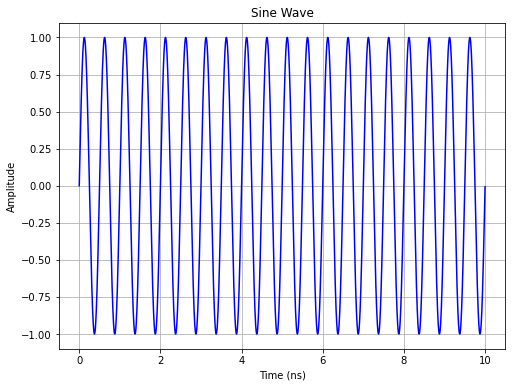

In [45]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'b')
plt.title('Sine Wave')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.grid(True, which='both')

plt.show()

### Calculate FFT and Plot

In [58]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
# phase?

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


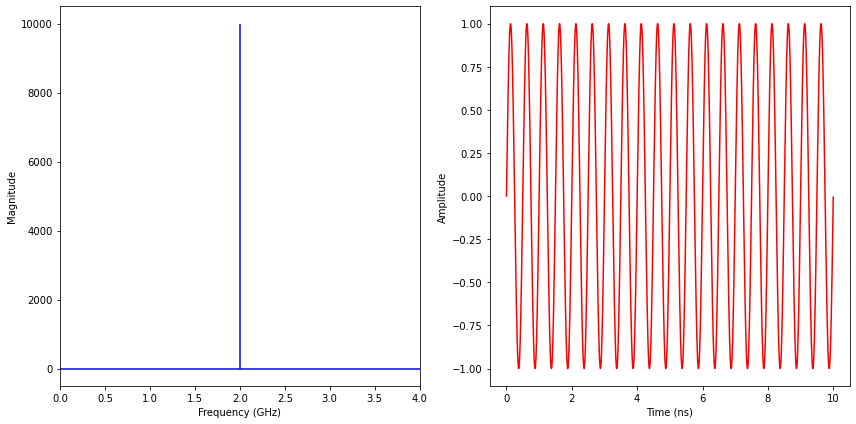

In [60]:
plt.figure(figsize = (12,6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.xlim(0, 4)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### Rectangular Pulse with width = 1 ns

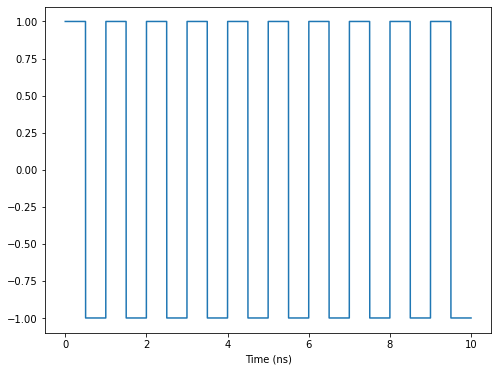

In [73]:
p = 1 # period
n = 10 # num of pulses


t = np.linspace(0, p*n, 10000, endpoint=False)
x = signal.square(2*np.pi*(1/p)*t)

plt.figure(figsize = (8, 6))
plt.xlabel('Time (ns)')
plt.plot(t, x)

### FFT 

In [76]:
x = signal.square(2*np.pi*(1/p)*t)

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

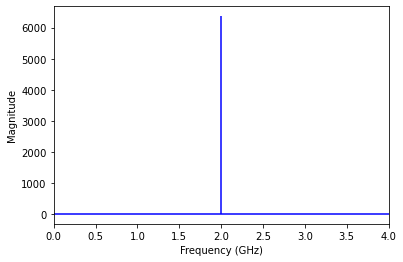

In [77]:
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.xlim(0, 4)

plt.show()